In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

## MedInfo2019 dataset

In [2]:
df = pd.read_excel("../data/finetuning/MedInfo2019-QA-Medications.xlsx")
df.head()

,Question,Focus (Drug),Question Type,Answer,Section Title,URL
0,how does rivatigmine and otc sleep medicine in...,rivastigmine,Interaction,tell your doctor and pharmacist what prescript...,What special precautions should I follow?,https://medlineplus.gov/druginfo/meds/a602009....
1,how does valium affect the brain,Valium,Action,Diazepam is a benzodiazepine that exerts anxio...,CLINICAL PHARMACOLOGY,https://dailymed.nlm.nih.gov/dailymed/drugInfo...
2,what is morphine,morphine,Information,Morphine is a pain medication of the opiate fa...,NaN,https://en.wikipedia.org/wiki/Morphine
3,what are the milligrams for oxycodone e,oxycodone ER,Dose,… 10 mg … 20 mg … 40 mg … 80 mg ...,HOW SUPPLIED,https://dailymed.nlm.nih.gov/dailymed/drugInfo...
4,81% aspirin contain resin and shellac in it. ?,aspirin 81 mg,Ingredient,Inactive Ingredients Ingredient Name,INGREDIENTS AND APPEARANCE,https://dailymed.nlm.nih.gov/dailymed/drugInfo...


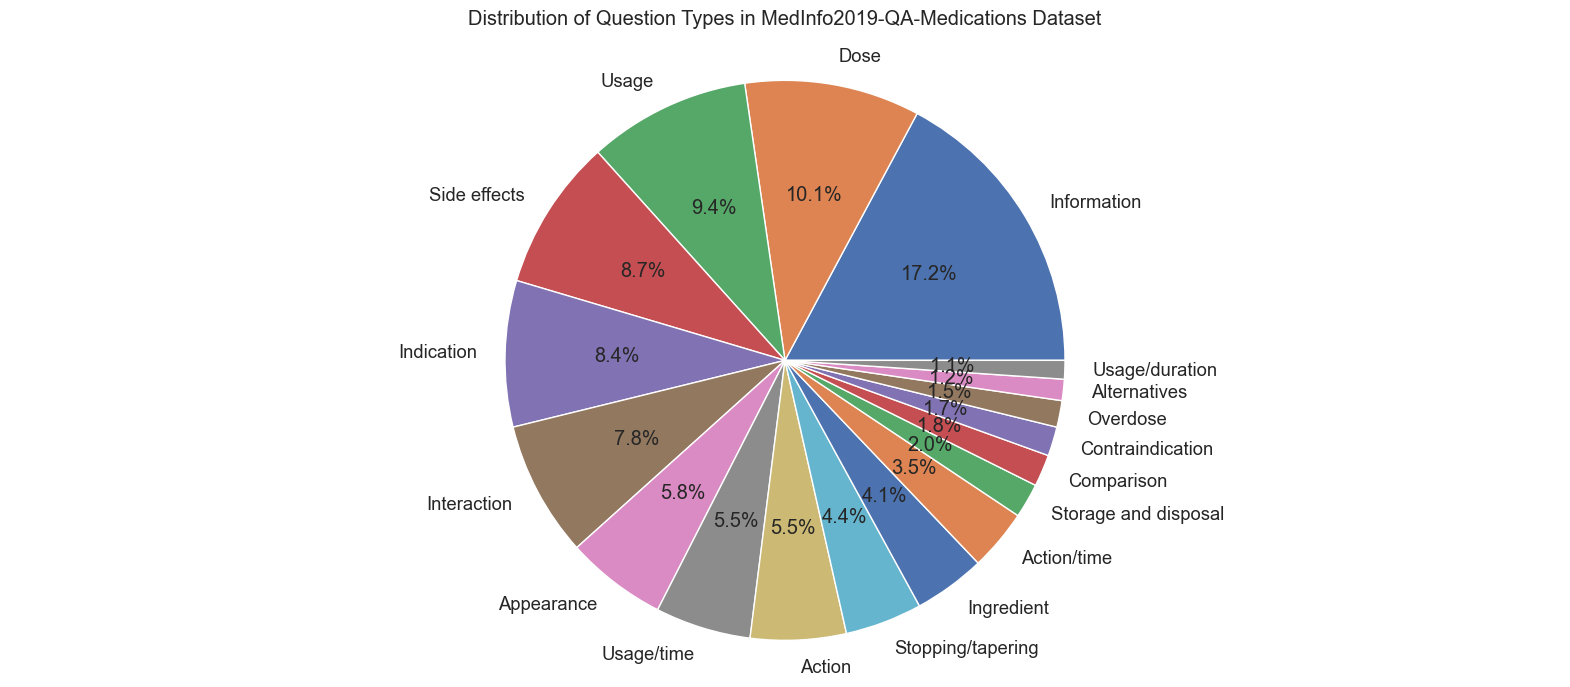

In [10]:
# The finetuning dataset goal is to teach the model how to answer with medical style not for memorize drug information

q_type_count = df['Question Type'].value_counts()
q_type = q_type_count[q_type_count > 5].index

fig, ax = plt.subplots(figsize=(20, 8))
sns.set_theme(font_scale=1.2)

ax.pie(q_type_count[q_type].values, labels=q_type, autopct='%1.1f%%')
ax.set_title('Distribution of Question Types in MedInfo2019-QA-Medications Dataset', pad=20)
ax.axis('equal')  
plt.show()

In [ ]:
# Show duplicated questions, but it is not a problem because although some questions are duplicated, the question type and answers are different
df[df['Question'].duplicated(keep=False)]

,Question,Focus (Drug),Question Type,Answer,Section Title,URL
7,breo inhaler how it works,Breo inhaler,Action,The combination of fluticasone and vilanterol ...,Why is this medication prescribed?,https://medlineplus.gov/druginfo/meds/a613037....
8,breo inhaler how it works,Breo inhaler,Usage,"To use the inhaler, follow these steps:\n\t1\t...",How should this medicine be used?,https://medlineplus.gov/druginfo/meds/a613037....
24,neupro and ropinirole when is it safe to take,neupro and ropinirole,Interaction,Anxiolytics; Sedatives; and Hypnotics: (Modera...,DRUG INTERACTIONS,https://www.pdr.net/drug-summary/Neupro-rotigo...
25,neupro and ropinirole when is it safe to take,neupro and ropinirole,Comparison,Switching from oral dopamine agonists to rotig...,Dosage and Administration,https://www.pbm.va.gov/clinicalguidance/drugmo...
50,vyvanse 10 what is all in this pill is it safe,Vyvanse,Ingredient,Active Ingredient/Active Moiety LISDEXAMFETAMI...,INGREDIENTS AND APPEARANCE,https://dailymed.nlm.nih.gov/dailymed/drugInfo...
...,...,...,...,...,...,...
608,how do steroids effect the digestive system,steroids,Side effects,Corticosteroid use was associated with increas...,Corticosteroids and risk of gastrointestinal b...,https://bmjopen.bmj.com/content/4/5/e004587
626,pneumonia vaccine is good for how long?,Pneumococcal Vaccines,Usage/duration,CDC recommends routine administration of pneum...,Pneumococcal Vaccine Recommendations,https://www.cdc.gov/vaccines/vpd/pneumo/hcp/re...
627,pneumonia vaccine is good for how long?,Pneumococcal Vaccines,Storage and disposal,Do not use any pneumococcal vaccine beyond the...,Administering Pneumococcal Vaccines,https://www.cdc.gov/vaccines/vpd/pneumo/hcp/ad...
672,where does fluorouracil come from,fluorouracil,Information,Fluorouracil is a nucleoside metabolic inhibit...,CLINICAL PHARMACOLOGY,https://dailymed.nlm.nih.gov/dailymed/drugInfo...


In [4]:
df[df['Question'].isna() | df['Answer'].isna()]

,Question,Focus (Drug),Question Type,Answer,Section Title,URL
212,how about the sexual medicine name,NaN,not_drug_question,NaN,NaN,NaN


In [5]:
print("before drop NA:", len(df))
df = df.dropna(subset=['Question', 'Answer'])
print("after drop NA:", len(df))

before drop NA: 690
after drop NA: 689


In [12]:
# Calculate the length of each answer
df['Answer_length'] = df['Answer'].apply(lambda x: len(str(x)))

# Calculate mean, median, and mode of answer lengths
mean_length = df['Answer_length'].mean()
median_length = df['Answer_length'].median()
mode_length = df['Answer_length'].mode()[0]  # mode() returns a Series, we take the first one

# Display results
print(f"Average answer length: {mean_length:.2f} characters")
print(f"Median answer length: {median_length} characters")
print(f"Mode answer length: {mode_length} characters")

Average answer length: 395.53 characters
Median answer length: 256.0 characters
Mode answer length: 10 characters


In [ ]:
# Not so important for fine tune, because the goal of fine tune dataset is to teach the model how to answer with medical style not for memorize drug information
unique_drugs = df["Focus (Drug)"].unique()
print(f"Total unique drugs: {len(unique_drugs)}")
print(unique_drugs)

Total unique drugs: 516
['rivastigmine' 'Valium' 'morphine' 'oxycodone ER' 'aspirin 81 mg'
 'desonide ointment' 'Tylenol' 'Breo inhaler' 'Qvar' 'cyclosporine'
 'Synthroid' 'fluvastatin' 'montelukast' 'ciprofloxacin' 'Lansoprazole'
 'fluorouracil' 'Levetiracetam' 'terazosin' 'meloxicam' 'nitroglycerin'
 'vitamin C' 'pregabalin' 'marijuana' 'neupro and ropinirole' 'prevnar'
 'oxycodone' 'lithium' 'MST' 'metformin' 'pravastatin'
 'metoprolol succinate' 'tramadol' 'denosumab' 'barbiturates'
 'pneumonia vaccine' 'insulin' 'medical marijuana' 'clonazepam' 'Levaquin'
 'vitamin D' 'formaldehyde' 'cyclobenzaprine | benzodiazepine'
 'vitamin D3' 'estrone injection' 'Rapaflo' 'levothyroxine' 'azithromycin'
 'Vyvanse' 'TrOOP' 'Flomax' 'insulin glargine'
 'medicines that raise blood sugar' 'metoprolol tartrate'
 'corticosteroids' 'drugs that reduce cholesterol' 'Gardasil' 'cromolyn'
 'lorazepam' 'thymol' 'zolpidem' 'mercaptopurine' 'colchicine'
 'methylphenidate' 'normal saline' 'Zostavax' 'Ciprode

In [4]:
TARGET_DRUGS = [
    "Aspirin", "Ibuprofen", "Paracetamol", "Acetaminophen",
    "Amoxicillin", "Azithromycin", "Ciprofloxacin",
    "Metformin", "Atorvastatin", "Lisinopril",
    "Omeprazole", "Levothyroxine", "Albuterol",
    "Gabapentin", "Sertraline", "Losartan",
    "Vitamin D", "Vitamin B12", "Vitamin C"
]

exist = 0
not_exist = 0
for drug in TARGET_DRUGS:
    if drug in unique_drugs:
        exist += 1
    else:
        not_exist += 1

print(f"Drugs found: {exist}, Drugs not found: {not_exist}")

Drugs found: 5, Drugs not found: 14


## MedQuAD dataset

In [2]:
medquad = pd.read_csv("../data/finetuning/MedQuAD.csv")
medquad.head()

,document_id,document_source,document_url,category,umls_cui,umls_semantic_types,umls_semantic_group,synonyms,question_id,question_focus,question_type,question,answer
0,559,GHR,https://ghr.nlm.nih.gov/condition/keratoderma-...,NaN,C0343073,T047,Disorders,KWWH,0000559-1,keratoderma with woolly hair,information,What is (are) keratoderma with woolly hair ?,Keratoderma with woolly hair is a group of rel...
1,559,GHR,https://ghr.nlm.nih.gov/condition/keratoderma-...,NaN,C0343073,T047,Disorders,KWWH,0000559-2,keratoderma with woolly hair,frequency,How many people are affected by keratoderma wi...,Keratoderma with woolly hair is rare; its prev...
2,559,GHR,https://ghr.nlm.nih.gov/condition/keratoderma-...,NaN,C0343073,T047,Disorders,KWWH,0000559-3,keratoderma with woolly hair,genetic changes,What are the genetic changes related to kerato...,"Mutations in the JUP, DSP, DSC2, and KANK2 gen..."
3,559,GHR,https://ghr.nlm.nih.gov/condition/keratoderma-...,NaN,C0343073,T047,Disorders,KWWH,0000559-4,keratoderma with woolly hair,inheritance,Is keratoderma with woolly hair inherited ?,Most cases of keratoderma with woolly hair hav...
4,559,GHR,https://ghr.nlm.nih.gov/condition/keratoderma-...,NaN,C0343073,T047,Disorders,KWWH,0000559-5,keratoderma with woolly hair,treatment,What are the treatments for keratoderma with w...,These resources address the diagnosis or manag...


In [3]:
medquad = medquad[medquad['document_source'] == 'MPlusDrugs']
unique_values = medquad['question_type'].unique().tolist()
unique_values

['indication',
 'usage',
 'precautions',
 'dietary',
 'forget a dose',
 'side effects',
 'storage and disposal',
 'emergency or overdose',
 'other information',
 'brand names',
 'important warning',
 'information',
 'severe reaction',
 'how can i learn more',
 'why get vaccinated',
 'contraindication',
 'brand names of combination products',
 'dose']

In [ ]:
unique_drugs_medquad = medquad['question_focus'].unique().tolist()
print(unique_drugs_medquad)  
print(f"Total unique drugs in MedQuAD: {len(unique_drugs_medquad)}")

['Glycopyrrolate', 'Sodium Ferric Gluconate Injection', 'Stavudine', 'Griseofulvin', 'Carvedilol', 'Ceftaroline Injection', 'Shingles (Zoster) Vaccine', 'Halobetasol', 'Papaverine', 'Midazolam Injection', 'Pemetrexed Injection', 'Peramivir Injection', 'Pilocarpine', 'Polio Vaccine', 'Albuterol Oral Inhalation', 'Abacavir', 'Metaxalone', 'Methimazole', 'Aclidinium Oral Inhalation', 'Voriconazole', 'Nafcillin Sodium Injection', 'Mometasone Topical', 'Varicella (Chickenpox) Vaccine', 'Mirabegron', 'Bisacodyl', 'Trimethoprim', 'Trazodone', 'Busulfan', 'Indacaterol Oral Inhalation', 'Iloprost', 'Brexpiprazole', 'Dolasetron Injection', 'Saquinavir', 'Rolapitant', 'Ranolazine', 'Quinapril', 'Ergoloid Mesylates', 'Eculizumab Injection', 'RimabotulinumtoxinB Injection', 'Diphenhydramine Topical', 'Dicyclomine', 'Dronedarone', 'Dicloxacillin', 'Dronabinol', 'Econazole Topical', 'Diphenhydramine', 'Riluzole', 'Quetiapine', 'Eprosartan and Hydrochlorothiazide', 'Ranitidine Hydrochloride Injection'

## RAG: knowledge_base.json

You can also see the detailed statistic of knowledge_base at ./data/rag/stats.json

In [2]:
df = pd.read_json('../data/rag/knowledge_base.json')

categories = df['category'].unique()

print("Categories inside knowledge base:")
print(categories)

category_counts = df['category'].value_counts()

print("\nFrequency of each category:")
print(category_counts)

Categories inside knowledge base:
['indications' 'warnings' 'dosage' 'contraindications' 'side_effects'
 'interactions' 'mechanism']

Frequency of each category:
category
dosage               96
warnings             71
side_effects         55
interactions         53
mechanism            52
indications          29
contraindications     9
Name: count, dtype: int64
